In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
np.set_printoptions(threshold=1000)
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

In [193]:
#combining train csv and test csv
data_train = pd.read_csv(r'C:\OneDrive - Parkway Pantai\WoRk\Pet projects\Jupyter notebook\Titanic dataset\train.csv')
print 'data_train shape', data_train.shape
data_test = pd.read_csv(r'C:\OneDrive - Parkway Pantai\WoRk\Pet projects\Jupyter notebook\Titanic dataset\test.csv')
data = pd.concat([data_train,data_test])
print 'data shape',data.shape
data.head()

data_train shape (891, 12)
data shape (1309, 12)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [65]:
#Checking the highlevel data disctionary as read by pandas
print data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


In [52]:
# prelim data exploration

#Chk if each SibSp also have tickets
print data[data.Name.str.contains('Cumings')]
#result - yes 
print '_'*40
## couples may not be male and female pairs eg:
print data[data.Name.str.contains('Braund')]
print '_'*40
#I noticed that many cabins were nulls, so lets see if there is a correlation btwn 'cabin' and 'Pclass (ticket class)'
print data[(data.Cabin.isnull())].groupby('Pclass')['Age'].count()
print '_'*40
# result - no correlation
print data[(data.Cabin.notnull())].groupby('Pclass')['Age'].count()
print '_'*40
# result - no correlation

      Age Cabin Embarked     Fare  \
1    38.0   C85        C  71.2833   
234  39.0   C85        C  71.2833   

                                                  Name  Parch  PassengerId  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
234                          Cumings, Mr. John Bradley      0         1126   

     Pclass     Sex  SibSp  Survived    Ticket  
1         1  female      1       1.0  PC 17599  
234       1    male      1       NaN  PC 17599  
________________________________________
      Age Cabin Embarked    Fare                       Name  Parch  \
0    22.0   NaN        S  7.2500    Braund, Mr. Owen Harris      0   
477  29.0   NaN        S  7.0458  Braund, Mr. Lewis Richard      0   

     PassengerId  Pclass   Sex  SibSp  Survived     Ticket  
0              1       3  male      1       0.0  A/5 21171  
477          478       3  male      1       0.0       3460  
________________________________________
Pclass
1     46
2    240
3    

In [55]:
#exploration on discreet (non-continuous) features - can be categorical or ordinal
print data.describe(include=['O'])
print '_'*40
print 'Some observations here (keeping in mind that total no of rows = 1309) -'
print '1. A lot of missing values in cabin'
print '2. 2 missing values in embarked'
print '3. No missing values in Name column. But hold on - 1 name is occuring 2 times!!- needs to be investigated'
print '4. No missing values. No transgenders. 843/1309 were males i.e. the majority'
print '5. No missing values. It seems 929 groups(could be families/friends) were travelling on titanic. Max grp size was 11'

              Cabin Embarked                  Name   Sex    Ticket
count           295     1307                  1309  1309      1309
unique          186        3                  1307     2       929
top     C23 C25 C27        S  Connolly, Miss. Kate  male  CA. 2343
freq              6      914                     2   843        11
________________________________________
Some observations here (keeping in mind that total no of rows = 1309) -
1. A lot of missing values in cabin
2. 2 missing values in embarked
3. No missing values in Name column. But hold on - 1 name is occuring 2 times!!- needs to be investigated
4. No missing values. No transgenders. 843/1309 were males i.e. the majority
5. No missing values. It seems 929 groups(could be families/friends) were travelling on titanic. Max grp size was 11


In [59]:
#investigate the name column with same value
print data[data.Name == 'Connolly, Miss. Kate']
print '_'*40
print 'Observation: At first I was wondering whether this was a duplicate row, but since the ticket numbers are different, I can assume that these 2 people with the same name are indeed different people'


      Age Cabin Embarked    Fare                  Name  Parch  PassengerId  \
289  22.0   NaN        Q  7.7500  Connolly, Miss. Kate      0          290   
6    30.0   NaN        Q  7.6292  Connolly, Miss. Kate      0          898   

     Pclass     Sex  SibSp  Survived  Ticket  
289       3  female      0       1.0  370373  
6         3  female      0       NaN  330972  
________________________________________
Observation: At first I was wondering whether this was a duplicate row, but since the ticket numbers are different, I can assume that these 2 people with the same name are indeed different people


In [75]:
#exploration on continuous features
print data.describe()
print '_'*40
print 'Some observations here (keeping in mind that total no of rows = 1309) -'
print '1. Age: has missing values, no visible outliers. Addn: a <2 month baby was onboard (I pray that he/she survived)'
print '2. Fare: has 1 missing value. some outliers'
print '3. Parch: Is a ORDINAL variable'
print '3. PassengerId: Is a CATEGORICAL variable'
print '4. Pclass: Is a ORDINAL variable'
print '5. SibSp: Is a ORDINAL variable'
print '6. Survived: Is a ORDINAL variable. Has 891 values referring to our test data size'

               Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027   655.000000     2.294882   
std      14.413493    51.758668     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived  
count  1309.000000  891.000000  
mean      0.498854    0.383838  
std       1.041658    0.486592  
min       0.000000    0.000000  
25%       0.000000    0.000000  
50%       0.000000    0.000000  
75%       1.000000    1.000000  
max       8.000000    1.000000  
____________________________________

In [74]:
#checking on survival of all babies for humanitarian sake
print 'Number of babies under age 1 grouped by survived'
print data[data.Age<1].groupby('Survived')['Age'].count()
print '_'*40
print 'Observation: There were 7 infants under age 1 and all of them surivived!! yipee!!'

Number of babies under age 1 grouped by survived
Survived
1.0    7
Name: Age, dtype: int64
________________________________________
Observation: There were 7 infants under age 1 and all of them surivived!! yipee!!


In [101]:
#Categorizing our features
ordinal_features = ['Parch','Pclass','SibSp']
continuous_features = ['Age','Fare',]
categorical_features = ['Cabin','Embarked','Name','Sex','Ticket','PassengerId']

In [195]:
#formalizing the missing values

print 'Missing values for ordinal features'
print data[ordinal_features].isnull().sum()
print '_'*40
print 'Missing values for continuous features'
print data[continuous_features].isnull().sum()
print '_'*40
print 'Missing values for categorical features'
print data[categorical_features].isnull().sum()
print '_'*40

Missing values for ordinal features
Parch     0
Pclass    0
SibSp     0
dtype: int64
________________________________________
Missing values for continuous features
Age     263
Fare      1
dtype: int64
________________________________________
Missing values for categorical features
Cabin          1014
Embarked          2
Name              0
Sex               0
Ticket            0
PassengerId       0
dtype: int64
________________________________________


0


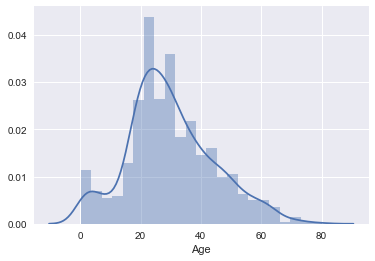

In [251]:
#Missing value treatment

#--------------------
# Cabin: I am going to drop the Cabin column since it has too many missing value i.e. 1014/1309 = 77% missing
data_new = data.drop('Cabin', axis=1)
#--------------------
# Embarked:
data_new[data_new.Embarked.isnull()]
#Inference: The two have the same ticket number, so we can assume that they embarked together. I will impute the mode value here
data_new.Embarked.fillna(data_new['Embarked'].mode()[0], inplace=True)

#--------------------
#Fare: I am imputing with the mean of the fare of similar passenger
data_new.Fare.fillna(data_new[(data_new.Embarked == 'S')& (data_new.Age>40) & (data_new.Pclass == 3) & (data_new.Sex == 'male')  \
         & (data_new.Fare.notnull())].Fare.mean(), inplace=True)
#--------------------
#Age:
data_new[data_new.Age.isnull()]
sns.distplot(data_new[data_new.Age.notnull()].Age)
# We observe that the distrubtion has a good central tendancy. We will thus impute mode to the value of age
data_new.Age.fillna(data_new.Age.mode()[0],inplace=True)
print data_new['Age'].isnull().sum()

In [252]:
#Rechecking the missing values

categorical_features = ['Embarked','Name','Sex','Ticket','PassengerId']

print 'Missing values for ordinal features'
print data_new[ordinal_features].isnull().sum()
print '_'*40
print 'Missing values for continuous features'
print data_new[continuous_features].isnull().sum()
print '_'*40
print 'Missing values for categorical features'
print data_new[categorical_features].isnull().sum()
print '_'*40
# All good as far as imputation is concerned

Missing values for ordinal features
Parch     0
Pclass    0
SibSp     0
dtype: int64
________________________________________
Missing values for continuous features
Age     0
Fare    0
dtype: int64
________________________________________
Missing values for categorical features
Embarked       0
Name           0
Sex            0
Ticket         0
PassengerId    0
dtype: int64
________________________________________


In [298]:
#Label encoding for Tickets
data_new1 = pd.get_dummies(data_new, columns=['Embarked', 'Sex']).drop(['Sex_female'], axis=1)
data_new1['Ticket_code'] = pd.Series(pd.Categorical(data_new1['Ticket']).codes)
data_new2 = data_new1.drop(['Ticket','Name'], axis=1)

data_new2.head(3)

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Ticket_code
0,22.0,7.2500,0,1,3,1,0.0,0,0,1,1,720
1,38.0,71.2833,0,2,1,1,1.0,1,0,0,0,816
2,26.0,7.9250,0,3,3,0,1.0,0,0,1,0,914


In [327]:
# Convert pd df to np array
X_train = data_new2.head(data_train.shape[0]).drop('Survived', axis=1)
X_test = data_new2.tail(data_test.shape[0]).drop('Survived', axis=1)
Y_train = data_new2.head(data_train.shape[0]).Survived
#print data_new2.as_matrix()

In [337]:
#Import sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV


In [346]:
# Lets try a few classification models here
KNN = KNeighborsClassifier()
param = {'n_neighbors':range(1,150)}
rscv = RandomizedSearchCV(KNN,param, n_iter=100, cv=10)
rscv.fit(X_train,Y_train)
print 'KNN :-'
print rscv.best_score_
print rscv.best_estimator_

KNN :-
0.668911335578
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=34, p=2,
           weights='uniform')


In [345]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
param = {'C':np.arange(.0001,1,.001)}
rscv = RandomizedSearchCV(LR,param, n_iter=15, cv=10)
rscv.fit(X_train,Y_train)
print 'LR :-'
print rscv.best_score_
print rscv.best_estimator_

LR :-
0.79797979798
LogisticRegression(C=0.39610000000000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


LogisticRegression(C=0.3961, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


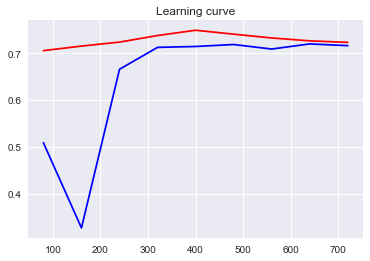

In [391]:
from sklearn.model_selection import learning_curve
#C=0.3961
LR = LogisticRegression(C=0.3961, solver='liblinear', max_iter=100, penalty='l1')
train_sizes, train_scores, test_scores = learning_curve(LR, X_train, Y_train, cv=10, scoring='f1', \
                                                        train_sizes=np.arange(.1,1,.1))

print LR

plt.title('Learning curve')
plt.plot(train_sizes, train_scores.mean(axis=1), color='red')
plt.plot(train_sizes, test_scores.mean(axis=1), color = 'blue')

In [458]:
LR = LogisticRegression(C=0.3961, solver='liblinear', max_iter=100, penalty='l1')
LR.fit(X_train, Y_train)
coef_1 =  LR.coef_
#print pd.DataFrame(coef_1)


LR = LogisticRegression(C=0.3961, solver='liblinear', max_iter=100, penalty='l2')
LR.fit(X_train, Y_train)
coef_2 =  LR.coef_
#print data_new2.drop('Survived', axis=1).columns.values

pd.DataFrame(zip(data_new2.drop('Survived', axis=1).columns.values, pd.DataFrame(coef_1).loc[0].values.tolist(), \
         pd.DataFrame(coef_2).loc[0].values.tolist())).sort_values(by=2)


,0,1,2
9,Sex_male,-2.532820,-2.318103
4,Pclass,-0.760222,-0.597303
5,SibSp,-0.282014,-0.266206
2,Parch,-0.069895,-0.073831
0,Age,-0.027745,-0.021024
10,Ticket_code,-0.000624,-0.000579
3,PassengerId,0.000183,0.000318
1,Fare,0.004778,0.006537
8,Embarked_S,0.000000,0.601686
7,Embarked_Q,0.000000,0.706647


LogisticRegression(C=0.103, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Best score for test =  0.707251205172


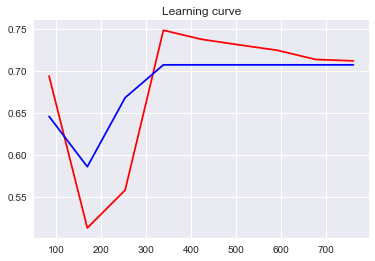

In [486]:
from sklearn.model_selection import learning_curve
#C=0.3961
LR = LogisticRegression(C=0.103, solver='liblinear', max_iter=100, penalty='l2')
train_sizes, train_scores, test_scores = learning_curve(LR, X_train[['Embarked_C','Sex_male','Pclass']], \
                                                        Y_train, cv=20, scoring='f1', \
                                                        train_sizes=np.arange(.1,1,.1))
#from l1,l2: 'Embarked_C','Sex_male','Pclass'
# from dec tree: ['Age','Fare','PassengerId','Sex_male','Ticket_code']

print LR
print '\n Best score for test = ', max(test_scores.mean(axis=1))
plt.title('Learning curve')
plt.plot(train_sizes, train_scores.mean(axis=1), color='red')
plt.plot(train_sizes, test_scores.mean(axis=1), color = 'blue')

In [529]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
param = {'C':np.arange(.0001,1,.001), 'penalty':['l2']}
rscv = RandomizedSearchCV(LR,param, n_iter=50, cv=15, scoring='f1')
rscv.fit(X_train[['Age','Fare','PassengerId','Sex_male','Ticket_code']],Y_train)
print 'LR :-'
print rscv.best_score_
print rscv.best_estimator_

LR :-
0.70531301522
LogisticRegression(C=0.61509999999999998, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [536]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#rfc.fit(X_train, Y_train)
param = {'max_depth': range(1,25), 'max_features':['auto',None]}
rscv = RandomizedSearchCV(rfc,param, n_iter=9, cv=15, scoring='f1')
rscv.fit(X_train,Y_train)
print rscv.best_score_
print rscv.best_estimator_

0.753742056099
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)



 Best score for test =  0.747258357189


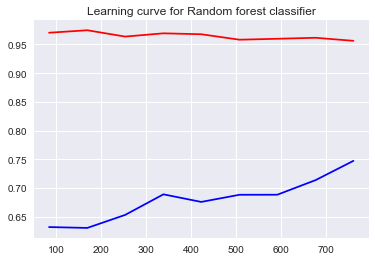

In [538]:
rfc = RandomForestClassifier(max_depth=11,max_features=None)

train_sizes, train_scores, test_scores = learning_curve(rfc, X_train, \
                                                        Y_train, cv=20, scoring='f1', \
                                                        train_sizes=np.arange(.1,1,.1))
#from l1,l2: 'Embarked_C','Sex_male','Pclass'
# from dec tree: ['Age','Fare','PassengerId','Sex_male','Ticket_code']

print '\n Best score for test = ', max(test_scores.mean(axis=1))
plt.title('Learning curve for Random forest classifier')
plt.plot(train_sizes, train_scores.mean(axis=1), color='red')
plt.plot(train_sizes, test_scores.mean(axis=1), color = 'blue')